# Python For Traders and Investors - Chapter 4

## 4.1 Handling date and time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Datetime handling is really important for quantitative trading applications. We often deal with different time zones, daylight saving, leap days and so on. This can really be a problem for our research. Let's see how we can deal with this effectively.

In [2]:
from datetime import datetime, timedelta

In [3]:
datetime.now()

datetime.datetime(2020, 2, 29, 14, 57, 12, 165565)

In [4]:
datetime.now() + timedelta(61)

datetime.datetime(2020, 4, 30, 14, 57, 12, 173376)

We get the time and date exactly 61 days from now. What about 61 days, 3 hours and 12 minutes?

In [5]:
new_time = datetime.now() + timedelta(61,3600*3+60*12)
new_time

datetime.datetime(2020, 4, 30, 18, 9, 12, 180768)

In [6]:
# Converting to string
str(new_time)

'2020-04-30 18:09:12.180768'

Here, we also turned the *datetime object* into a string for better readability. In backtests we often start with a date string and then have to some datetime arithmetic. Previously we read a .csv file line-by-line:

In [8]:
dates = []
fid = open('output.csv')
fid.readline() 
for i in fid:
    line = i.strip().split(',')
    dates.append(line[0])

In [9]:
dates[:3]

['2012-12-31', '2013-01-02', '2013-01-03']

Converting date strings to datetime objects:

In [10]:
from dateutil.parser import parse

In [11]:
# This gives us the datetime object of the first date in our price data file
parse(dates[0])

datetime.datetime(2012, 12, 31, 0, 0)

In [13]:
# But if we parse the whole 'dates' list:
#parse(dates)
# The above code will cause error. See next few lines for another method.

Another method is to use the to_datetime() function from pandas:

In [14]:
pd.to_datetime(dates[0])

Timestamp('2012-12-31 00:00:00')

In [15]:
pd.to_datetime(dates)

DatetimeIndex(['2012-12-31', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
               '2013-01-11', '2013-01-14',
               ...
               '2016-01-13', '2016-01-14', '2016-01-15', '2016-01-19',
               '2016-01-20', '2016-01-21', '2016-01-22', '2016-01-25',
               '2016-01-26', '2016-01-27'],
              dtype='datetime64[ns]', length=774, freq=None)

## 4.2 Converting timezones

Let's calculate the time period that is covered by our data file:

In [16]:
dates

['2012-12-31',
 '2013-01-02',
 '2013-01-03',
 '2013-01-04',
 '2013-01-07',
 '2013-01-08',
 '2013-01-09',
 '2013-01-10',
 '2013-01-11',
 '2013-01-14',
 '2013-01-15',
 '2013-01-16',
 '2013-01-17',
 '2013-01-18',
 '2013-01-22',
 '2013-01-23',
 '2013-01-24',
 '2013-01-25',
 '2013-01-28',
 '2013-01-29',
 '2013-01-30',
 '2013-01-31',
 '2013-02-01',
 '2013-02-04',
 '2013-02-05',
 '2013-02-06',
 '2013-02-07',
 '2013-02-08',
 '2013-02-11',
 '2013-02-12',
 '2013-02-13',
 '2013-02-14',
 '2013-02-15',
 '2013-02-19',
 '2013-02-20',
 '2013-02-21',
 '2013-02-22',
 '2013-02-25',
 '2013-02-26',
 '2013-02-27',
 '2013-02-28',
 '2013-03-01',
 '2013-03-04',
 '2013-03-05',
 '2013-03-06',
 '2013-03-07',
 '2013-03-08',
 '2013-03-11',
 '2013-03-12',
 '2013-03-13',
 '2013-03-14',
 '2013-03-15',
 '2013-03-18',
 '2013-03-19',
 '2013-03-20',
 '2013-03-21',
 '2013-03-22',
 '2013-03-25',
 '2013-03-26',
 '2013-03-27',
 '2013-03-28',
 '2013-04-01',
 '2013-04-02',
 '2013-04-03',
 '2013-04-04',
 '2013-04-05',
 '2013-04-

In [17]:
dates[0]

'2012-12-31'

In [18]:
dates[-1]

'2016-01-27'

In [19]:
(parse(dates[-1]) - parse(dates[0]))

datetime.timedelta(1122)

Timedelta objects specify days and seconds. The time period in our file is 3662 days. We can also output that number as an integer for further use:

In [20]:
# The exact number of days
(parse(dates[-1]) - parse(dates[0])).days

1122

In [21]:
# Let's go a bit crazy:
(parse(dates[-1]) - parse(dates[0])).total_seconds()

96940800.0

There are other ways to generate a datetime object. Sometimes we need them as our parser is quite slow because it has to figure out what format our date string is in. Alternatively, we can split up our date string into integer numbers and feed them into datetime:

In [22]:
# Much faster but more complicated than the dateutil parser.
ns = dates[0].split('-')
datetime(int(ns[0]),int(ns[1]),int(ns[2]))

datetime.datetime(2012, 12, 31, 0, 0)

If we deal with multiple international exchanges it is always a good idea to convert all the times into universal time (UTC), which is the Greenwich mean time (London) without the daylight saving.

In [23]:
ns

['2012', '12', '31']

In [24]:
import pytz

In [25]:
datetime(int(ns[0]), int(ns[1]), int(ns[2]), tzinfo=pytz.utc)

datetime.datetime(2012, 12, 31, 0, 0, tzinfo=<UTC>)

In [26]:
datetime.now(pytz.timezone('UTC'))

datetime.datetime(2020, 2, 29, 3, 59, 38, 941021, tzinfo=<UTC>)

In [27]:
datetime.now()

datetime.datetime(2020, 2, 29, 14, 59, 38, 945724)

To be honest, the standard timezone handling in Python is pretty average. There is a package called delorean (remember the movie "Back to the Future") that makes it much simpler.

http://delorean.readthedocs.io/en/latest/quickstart.html

In [28]:
from delorean import Delorean

In [29]:
d1 = Delorean(datetime(2019, 12, 1), timezone='Australia/Sydney')
d1

Delorean(datetime=datetime.datetime(2019, 12, 1, 0, 0), timezone='Australia/Sydney')

We now look at what time it is currently in the US/Eastern timezone

In [30]:
# Convert the datetime to US/Eastern timezone
d1 = d1.shift("US/Eastern")

# Convert to string 
str(d1.datetime)

'2019-11-30 08:00:00-05:00'

If we subtract the different times from the two timezones we should get zero time difference:

In [31]:
# Time arithmetic: difference between different time zones
d1.datetime - d1.shift("US/Eastern").datetime

datetime.timedelta(0)

For very fast applications it is recommended to use the so-called __Unix timestamp__. Linux time is the number of seconds since the first of Jan 1970 in UTC. This is just a float number and much faster to process than a time stamp, but less descriptive. We simply get Linux time like this:

In [32]:
str(d1.datetime)

'2019-11-30 08:00:00-05:00'

In [33]:
d1.epoch

1575118800.0

In [34]:
timestmp = d1.epoch

In [35]:
timestmp = d1.epoch
timestmp

1575118800.0

In [36]:
datetime.fromtimestamp(timestmp)

datetime.datetime(2019, 12, 1, 0, 0)

In [37]:
now = datetime.now()
now

datetime.datetime(2020, 2, 29, 14, 59, 39, 22013)

In [38]:
timestamp_now = datetime.timestamp(now)
timestamp_now

1582948779.022013

The choice of formats always depends on the individual application.

## 4.3 Calculating returns

In [39]:
import pandas as pd
import numpy as np

In [40]:
data = pd.read_csv('output.csv', index_col=0, parse_dates=True)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,355.640656,348.348358,350.350342,354.044037,3990800.0,354.044037
2013-01-02,363.863861,358.633636,360.070068,361.987000,5077500.0,361.987000
2013-01-03,366.331329,360.720734,362.827820,362.197205,4631700.0,362.197205
2013-01-04,371.106110,364.204193,365.035034,369.354340,5521400.0,369.354340
2013-01-07,370.060059,365.655670,368.093079,367.742737,3308000.0,367.742737


In [41]:
data['%_return'] = data['Close'].pct_change()

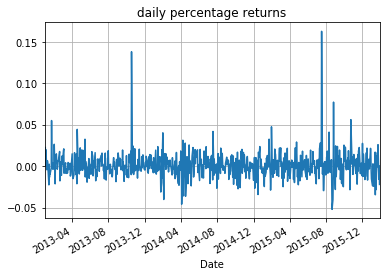

In [42]:
data['%_return'].plot()
plt.title('daily percentage returns')
plt.grid()
plt.show()

In [43]:
data['%_return'].head()

Date
2012-12-31         NaN
2013-01-02    0.022435
2013-01-03    0.000581
2013-01-04    0.019760
2013-01-07   -0.004363
Name: %_return, dtype: float64

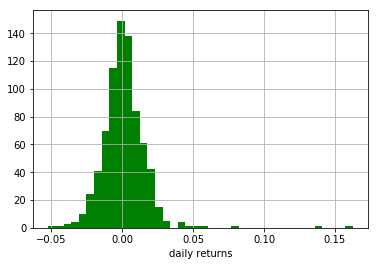

In [44]:
plt.hist(data['%_return'].dropna(), bins=40, color='g')
plt.grid()
plt.xlabel('daily returns')
plt.show()

In [45]:
data['Close'].resample('M').last().head()

Date
2012-12-31    354.044037
2013-01-31    378.223236
2013-02-28    401.001007
2013-03-31    397.492493
2013-04-30    412.697693
Freq: M, Name: Close, dtype: float64

#### Monthly returns

In [46]:
data['Close'].resample('M').ffill().head()

Date
2012-12-31    354.044037
2013-01-31    378.223236
2013-02-28    401.001007
2013-03-31    397.492493
2013-04-30    412.697693
Freq: M, Name: Close, dtype: float64

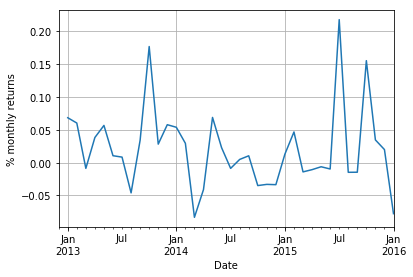

In [47]:
data['Close'].resample('M').ffill().pct_change().plot()
plt.ylabel('% monthly returns')
plt.grid()
plt.show()

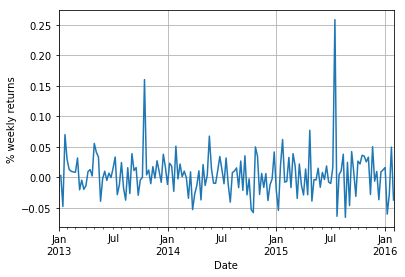

In [48]:
# Weekly returns
data['Close'].resample('W').ffill().pct_change().plot()
plt.ylabel('% weekly returns')
plt.grid()
plt.show()

#### Cumulative returns

cumprod(): Return cumulative product over a DataFrame or Series axis

In [49]:
data['cum_return'] = (data['%_return'] + 1).cumprod()

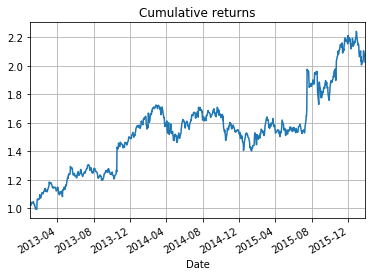

In [50]:
data['cum_return'].plot()
plt.title('Cumulative returns')
plt.grid()
plt.show()

## 4.4 Calculating volatility

In [51]:
data.drop(['cum_return'], axis=1, inplace=True)

In [52]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,%_return
Date,,,,,,,
2012-12-31,355.640656,348.348358,350.350342,354.044037,3990800.0,354.044037,NaN
2013-01-02,363.863861,358.633636,360.070068,361.987000,5077500.0,361.987000,0.022435
2013-01-03,366.331329,360.720734,362.827820,362.197205,4631700.0,362.197205,0.000581
2013-01-04,371.106110,364.204193,365.035034,369.354340,5521400.0,369.354340,0.019760
2013-01-07,370.060059,365.655670,368.093079,367.742737,3308000.0,367.742737,-0.004363


In [53]:
# Apply a rolling window of 10
data['volatility'] = data['%_return'].rolling(10).std()

In [54]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close,%_return,volatility
Date,,,,,,,,
2016-01-21,737.669983,711.109985,720.169983,726.669983,2596900.0,726.669983,0.011286,0.019537
2016-01-22,748.559998,740.500000,742.000000,745.460022,2357300.0,745.460022,0.025858,0.020256
2016-01-25,752.460022,732.500000,743.840027,733.619995,2267000.0,733.619995,-0.015883,0.020447
2016-01-26,739.460022,726.969971,735.210022,733.789978,1547000.0,733.789978,0.000232,0.020429
2016-01-27,735.890015,713.450012,735.890015,717.580017,2121400.0,717.580017,-0.022091,0.020644


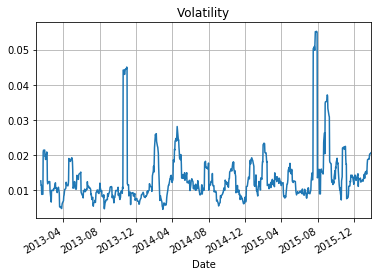

In [55]:
data['volatility'].plot()
plt.title('Volatility')
plt.grid()
plt.show()

In [56]:
import pandas_datareader

In [57]:
# Download data for AMZN, GOOG, COST and S&P500
mydata = pandas_datareader.get_data_yahoo(['AMZN', 'GOOG', 'COST', '^GSPC'])

In [58]:
mydata.head(2)

Attributes        High                                             Low  \
Symbols           AMZN       COST        GOOG        ^GSPC        AMZN   
Date                                                                     
2009-12-31  137.279999  60.299999  311.532288  1127.640015  134.520004   
2010-01-04  136.610001  60.070000  313.579620  1133.869995  133.139999   

Attributes                                            Open             ...  \
Symbols          COST        GOOG        ^GSPC        AMZN       COST  ...   
Date                                                                   ...   
2009-12-31  59.110001  308.832428  1114.810059  137.089996  60.240002  ...   
2010-01-04  59.130001  310.954468  1116.560059  136.250000  59.130001  ...   

Attributes       Close                  Volume                        \
Symbols           GOOG        ^GSPC       AMZN       COST       GOOG   
Date                                                                   
2009-12-31  308.832428  1115.099976  4523000.0  1862900.0  2448700.0   
2010-01-04  312.204773  1132.989990  7599900.0  3280200.0  3927000.0   

Attributes                 Adj Close                                      
Symbols            ^GSPC        AMZN       COST        GOOG        ^GSPC  
Date                                                                      
2009-12-31  2.076990e+09  134.520004  45.832966  308.832428  1115.099976  
2010-01-04  3.991400e+09  133.899994  46.018879  312.204773  1132.989990  

[2 rows x 24 columns]

In [59]:
mydata.columns

MultiIndex(levels=[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], ['AMZN', 'COST', 'GOOG', '^GSPC']],
           codes=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5], [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]],
           names=['Attributes', 'Symbols'])

In [60]:
df_close = mydata['Adj Close']
df_close.head()

Symbols,AMZN,COST,GOOG,^GSPC
Date,,,,
2009-12-31,134.520004,45.832966,308.832428,1115.099976
2010-01-04,133.899994,46.018879,312.204773,1132.989990
2010-01-05,134.690002,45.879436,310.829926,1136.520020
2010-01-06,132.250000,46.475872,302.994293,1137.140015
2010-01-07,130.000000,46.251236,295.940735,1141.689941


In [61]:
# Apply pct_change, and then 10-period moving window standard deviation
volatility = df_close.pct_change().rolling(10).std()

In [62]:
volatility.tail()

Symbols,AMZN,COST,GOOG,^GSPC
Date,,,,
2020-02-24,0.019303,0.011874,0.017214,0.011977
2020-02-25,0.016691,0.014794,0.015973,0.014081
2020-02-26,0.016284,0.014655,0.016197,0.013819
2020-02-27,0.019881,0.018080,0.020878,0.017086
2020-02-28,0.020142,0.019853,0.022742,0.016747


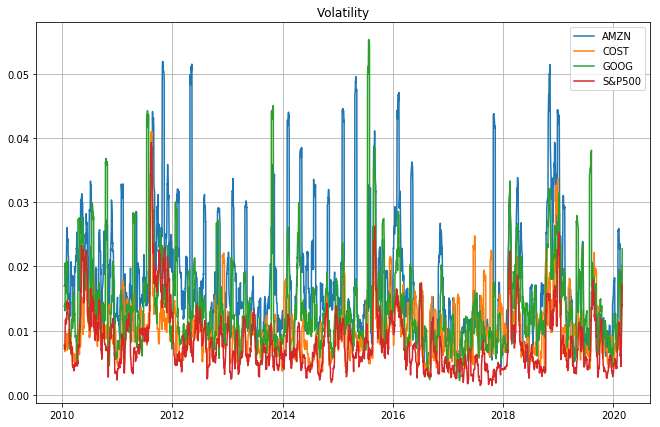

In [63]:
fig = plt.figure(figsize=(11,7))
plt.plot(volatility)
plt.legend(['AMZN', 'COST', 'GOOG', 'S&P500'])
plt.grid()
plt.title('Volatility')
plt.show()

__Annualised volatility__

In [64]:
# Annualised volatility for daily data
ann_vola = volatility*np.sqrt(252)

In [65]:
# Annualised volatility for hourly data
trading_hrs = 8
ann_vola = volatility*np.sqrt(252*trading_hrs)

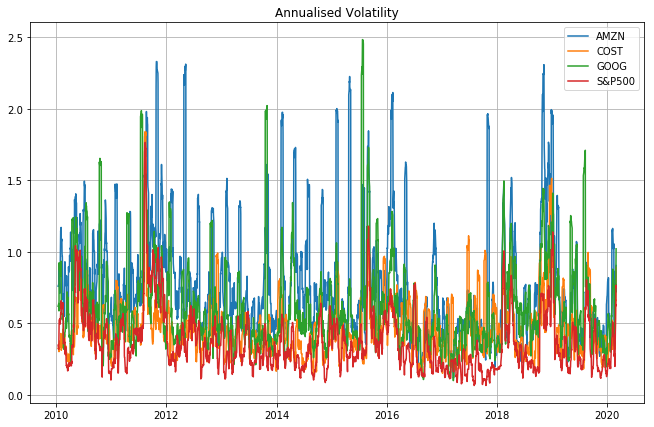

In [66]:
fig = plt.figure(figsize=(11,7))
plt.plot(ann_vola)
plt.legend(['AMZN', 'COST', 'GOOG', 'S&P500'])
plt.grid()
plt.title('Annualised Volatility')
plt.show()

## 4.5 Correlations in the market

In [67]:
mydata1 = pandas_datareader.get_data_yahoo(['GLD', 'XOM', 'LUV', 'DAL', '^GSPC', 'AMZN'])

In [68]:
mydata1.head()

Attributes        High                                                    \
Symbols           AMZN    DAL         GLD    LUV        XOM        ^GSPC   
Date                                                                       
2009-12-31  137.279999  11.48  108.110001  11.53  68.860001  1127.640015   
2010-01-04  136.610001  11.43  110.139999  11.46  69.260002  1133.869995   
2010-01-05  135.479996  12.34  110.389999  11.79  69.449997  1136.630005   
2010-01-06  134.729996  12.24  111.769997  11.79  70.599998  1139.189941   
2010-01-07  132.320007  12.86  111.290001  11.74  70.059998  1142.459961   

Attributes         Low                            ...      Volume              \
Symbols           AMZN    DAL         GLD    LUV  ...         GLD         LUV   
Date                                              ...                           
2009-12-31  134.520004  11.22  107.239998  11.30  ...   9124700.0   5805400.0   
2010-01-04  133.139999  10.95  109.309998  11.09  ...  16224100.0   9625000.0   
2010-01-05  131.809998  11.29  109.260002  11.20  ...  14213100.0  13355100.0   
2010-01-06  131.649994  11.85  110.410004  11.38  ...  24981900.0  10523900.0   
2010-01-07  128.800003  12.05  110.620003  11.27  ...  13609800.0  10055100.0   

Attributes                             Adj Close                         \
Symbols            XOM         ^GSPC        AMZN        DAL         GLD   
Date                                                                      
2009-12-31  18852300.0  2.076990e+09  134.520004  10.108876  107.309998   
2010-01-04  27809100.0  3.991400e+09  133.899994   9.966747  109.800003   
2010-01-05  30174700.0  2.491020e+09  134.690002  10.748451  109.699997   
2010-01-06  35044700.0  4.972660e+09  132.250000  10.757335  111.510002   
2010-01-07  27192100.0  5.270680e+09  130.000000  11.272549  110.820000   

Attributes                                     
Symbols           LUV        XOM        ^GSPC  
Date                                           
2009-12-31  10.645019  48.657547  1115.099976  
2010-01-04  10.412189  49.342556  1132.989990  
2010-01-05  10.961664  49.535217  1136.520020  
2010-01-06  10.635702  49.963345  1137.140015  
2010-01-07  10.794029  49.806370  1141.689941  

[5 rows x 36 columns]

In [69]:
ret = mydata1['Adj Close'].pct_change().dropna()

In [70]:
ret.head()

Symbols,AMZN,DAL,GLD,LUV,XOM,^GSPC
Date,,,,,,
2010-01-04,-0.004609,-0.014060,0.023204,-0.021872,0.014078,0.016043
2010-01-05,0.005900,0.078431,-0.000911,0.052772,0.003905,0.003116
2010-01-06,-0.018116,0.000826,0.016500,-0.029737,0.008643,0.000546
2010-01-07,-0.017013,0.047894,-0.006188,0.014886,-0.003142,0.004001
2010-01-08,0.027077,-0.017336,0.004963,-0.022433,-0.004012,0.002882


In [71]:
corr = ret.corr()

In [72]:
corr

Symbols,AMZN,DAL,GLD,LUV,XOM,^GSPC
Symbols,,,,,,
AMZN,1.000000,0.286267,-0.038686,0.302039,0.318686,0.564494
DAL,0.286267,1.000000,-0.097293,0.681633,0.261308,0.519032
GLD,-0.038686,-0.097293,1.000000,-0.085510,0.034766,-0.016196
LUV,0.302039,0.681633,-0.085510,1.000000,0.301800,0.545323
XOM,0.318686,0.261308,0.034766,0.301800,1.000000,0.722159
^GSPC,0.564494,0.519032,-0.016196,0.545323,0.722159,1.000000


In [73]:
import seaborn as sns

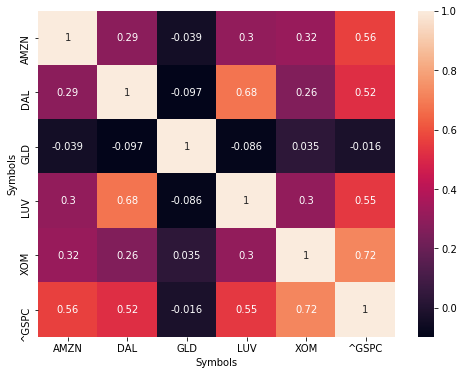

In [74]:
# plot the heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, annot=True, xticklabels=corr.columns, 
            yticklabels=corr.columns);

__Note: Correlation changes over time!__

In [75]:
# Applying a 1-year rolling window to calculate correlation  
# between GLD and XOM
rolling_cor = ret['GLD'].rolling(window=252).corr(ret['XOM'])
rolling_cor.tail()

Date
2020-02-24   -0.268368
2020-02-25   -0.230390
2020-02-26   -0.232285
2020-02-27   -0.218146
2020-02-28   -0.255495
dtype: float64

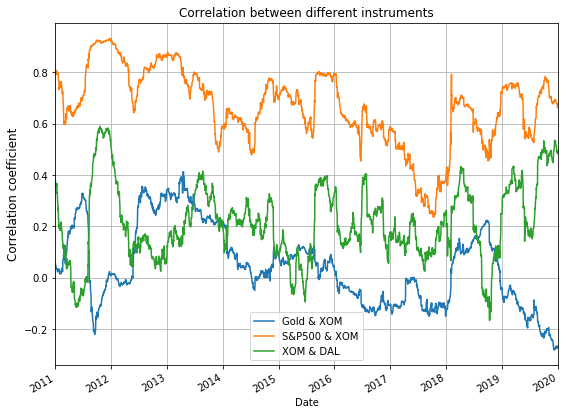

In [76]:
fig = plt.figure(figsize=(9,7))
ret['GLD'].rolling(window=200).corr(ret['XOM']).plot()
ret['^GSPC'].rolling(window=100).corr(ret['XOM']).plot()
ret['XOM'].rolling(window=100).corr(ret['DAL']).plot()
plt.title('Correlation between different instruments')
plt.xlim(['2011', '2020'])
plt.ylabel('Correlation coefficient', fontsize=12)
plt.legend(['Gold & XOM', 'S&P500 & XOM', 'XOM & DAL'])
plt.grid()
plt.show()

## 4.6 Linear regression analysis

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
ret['XOM'].values

array([ 0.01407817,  0.00390457,  0.00864289, ..., -0.02195576,
       -0.0601773 ,  0.03251704])

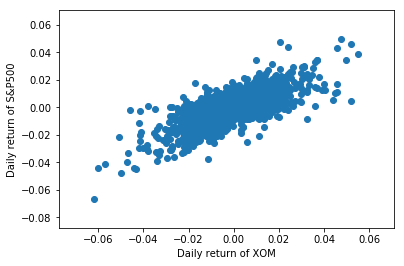

In [79]:
plt.scatter(ret['XOM'], ret['^GSPC'])
plt.xlabel('Daily return of XOM')
plt.ylabel('Daily return of S&P500')
plt.show()

In [80]:
x = np.array([ret['XOM']]).T
y = np.array(ret['^GSPC'])

In [81]:
# Instantiate the LinearRegression model:
lm = LinearRegression()

In [82]:
lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
# Extract the intercept:
lm.intercept_

0.00037262367231832985

In [84]:
# The slope:
lm.coef_

array([0.56963812])

In [85]:
def plot_LR(x, y, a, beta):
    '''function that plots the regression with original points'''
    xx = np.linspace(min(x), max(x),200) 
    yy = a + beta * xx
    
    plt.plot(x, y,'o', ms=2)
    plt.plot(xx,yy)  # the regression line
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    plt.title('y = %f + %f*x'%(a, beta))

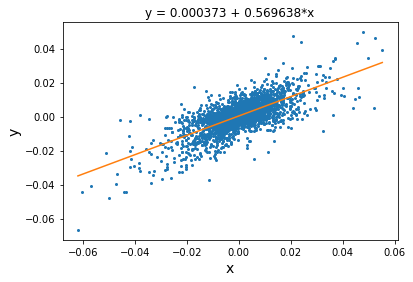

In [86]:
plot_LR(x, y, lm.intercept_, lm.coef_)